<a href="https://colab.research.google.com/github/brianhumphreys/Moire-Detector/blob/main/Copy_of_Playground_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Playground

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Mon Jul 12 21:27:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

To enable a high-RAM runtime, select the Runtime > "Change runtime type"
menu, and then select High-RAM in the Runtime shape dropdown. Then, 
re-execute this cell.


## Test 2D Wavelet Decomposition function
This function(fwdHaarDWT2D) computes the 2D Wavelet Transform in the image. All the input images are passed through a Haar Wavelet Decomposition module, to get the LL, LH, HL and HHH component of the image.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir("/content/drive/")
!ls

os.chdir("../..")
!ls


MyDrive
bin	 datalab  home	 lib64	opt   run   sys		       tools
boot	 dev	  lib	 media	proc  sbin  tensorflow-1.15.2  usr
content  etc	  lib32  mnt	root  srv   tmp		       var


In [2]:
!ls /content/drive/MyDrive/Moire
!pip install pyheif whatimage
# !pip show wand

augmentedTrainedNegative     notNormalizedPositiveImages
augmentedTrainedPositive     preaugmentedNegativeImages
notNormalizedNegativeImages  preaugmentedPositiveImages
     |████████████████████████████████| 8.2MB 16.8MB/s 


In [5]:
!ls /content/drive/MyDrive/Moire/notNormalizedPositiveImages/
!ls /content/drive/MyDrive/Moire/notNormalizedNegativeImages/
!uname -m

2005-Subaru-Forester-left-front.jpeg
2013-mercedes-benz-c63-amg-edition-507-photo-499741-s-986x603.jpeg
2014-mercedes-benz-e350-4matic-wagon.jpeg
2018-ford-taurus-sho-release-date-640x480.jpeg
44061639-9671581-The_biggest_riser_among_these_rather_unexceptional_old_motors_is-a-3_1623422340773.jpeg
50368478887_cae688182a_k.jpeg
99_photos_toyota_hilux_2001_2.jpeg
AAKYIDz.jpeg
abarth-124-14-1024x576.jpeg
classic-renault-safety-advances-in-motoring.jpeg
dims.jpeg
F.75.jpg
g63-amg-1024x453.jpeg
green-car.jpeg
HBcXPzpDSxCIWPRMWey2rg.jpeg
images_58459.jpeg
jaguar-xj-30-awd.jpeg
lots-of-road.jpeg
lotus-carlton.jpeg
Ob7t24y.jpeg
vw_touareg_v10_tdi_facelift_-s-56bcbdf96ac41.jpeg
x86_64


## Normalized Raw data to 1000x750 pixel images
Images are cropped to fit a 3:4 aspect ratio and then resized to match a 1000x750 size.


In [6]:
# importing the module


import os
from os import listdir
from os.path import isfile, join
import numpy as np

import whatimage
import pyheif
from PIL import Image


def decodeImage(bytesIo):
    with open(bytesIo, 'rb') as f:
      data = f.read()
      fmt = whatimage.identify_image(data)
      if fmt in ['heic', 'avif']:
        i = pyheif.read_heif(data)
        pi = Image.frombytes(mode=i.mode, size=i.size, data=i.data)
        pi.save("heic.jpg", format="jpeg")

# import pyheif
# import PIL
# import exifread


def read_heic(path: str):
    # with open(path, 'rb') as file:
    #     image = pyheif.read_heif(file)
    #     for metadata in image.metadata or []:
    #         if metadata['type'] == 'Exif':
    #             fstream = io.BytesIO(metadata['data'][6:])

    # # now just convert to jpeg
    # pi = PIL.Image.open(fstream)
    # pi.save("heic.jpg", "JPEG")

    # or do EXIF processing with exifread
    # tags = exifread.process_file(fstream)
    img = Wimage(path)
    img.format = 'jpg'
    img.save(filename="heic.jpg")
    img.close()

def openImage(fileName):
  # try:
  #   return Image.open(fileName)
  # except:
  #   read_heic(fileName)
  #   return Image.open("heic.jpg")
  decodeImage(fileName)
  return Image.open("heic.jpg")

def cropAndSave(image, fileName):
    # image = Image.open('images/original.jpg')
    width = image.size[0]
    height = image.size[1]

    aspect = width / float(height)

    if (height > width):
        image = image.rotate(90, Image.NEAREST, expand=1)
        width = image.size[0]
        height = image.size[1]

    ideal_width = 1000
    ideal_height = 750

    ideal_aspect = ideal_width / float(ideal_height)

    if aspect > ideal_aspect:
        # Then crop the left and right edges:
        new_width = int(ideal_aspect * height)
        offset = (width - new_width) / 2
        resize = (offset, 0, width - offset, height)
    else:
        # ... crop the top and bottom:
        new_height = int(width / ideal_aspect)
        offset = (height - new_height) / 2
        resize = (0, offset, width, height - offset)

    thumb = image.crop(resize).resize((ideal_width, ideal_height), Image.ANTIALIAS)
    thumb.save(fileName)

positiveTrainImagePath = '/content/drive/MyDrive/Moire/preaugmentedPositiveImages'
negativeTrainImagePath = '/content/drive/MyDrive/Moire/preaugmentedNegativeImages'

if not os.path.exists(positiveTrainImagePath):
    os.makedirs(positiveTrainImagePath)
if not os.path.exists(negativeTrainImagePath):
    os.makedirs(negativeTrainImagePath)

positiveUnnormalizedDataPath = '/content/drive/MyDrive/Moire/notNormalizedPositiveImages'
negativeUnnormalizedDataPath = '/content/drive/MyDrive/Moire/notNormalizedNegativeImages'

positiveImageFiles = [f for f in listdir(positiveUnnormalizedDataPath) if (isfile(join(positiveUnnormalizedDataPath, f)))]
negativeImageFiles = [f for f in listdir(negativeUnnormalizedDataPath) if (isfile(join(negativeUnnormalizedDataPath, f)))]

# LLList = [l for l in positiveImageFiles if 'LLL' in l]
# print(LLList)

for f in positiveImageFiles:
    print(join(positiveUnnormalizedDataPath, f))
    img = openImage(join(positiveUnnormalizedDataPath, f))

    rgb_im = img.convert("RGB")
    components = f.split('.')
    newComponents = components[:len(components) - 1]
    newComponents.append('jpg')
    newFileName = '.'.join(newComponents)

    print(newFileName)

    cropAndSave(rgb_im, join(positiveTrainImagePath, newFileName))
    # rgb_im.save(join(positiveTrainImagePath, newFileName))

for f in negativeImageFiles:
    print(join(negativeUnnormalizedDataPath, f))
    img = Image.open(join(negativeUnnormalizedDataPath, f))

    rgb_im = img.convert("RGB")
    components = f.split('.')
    newComponents = components[:len(components) - 1]
    newComponents.append('jpg')
    newFileName = '.'.join(newComponents)

    print(newFileName)

    cropAndSave(rgb_im, join(negativeTrainImagePath, newFileName))
    # rgb_im.save(join(negativeTrainImagePath, newFileName))

# for f in negativeImageFiles:
#     print(join(negativeUnnormalizedDataPath, f))
#     img = Image.open(join(negativeUnnormalizedDataPath, f))
#     print(np.array(img))

/content/drive/MyDrive/Moire/notNormalizedNegativeImages/vw_touareg_v10_tdi_facelift_-s-56bcbdf96ac41.jpeg
vw_touareg_v10_tdi_facelift_-s-56bcbdf96ac41.jpg
/content/drive/MyDrive/Moire/notNormalizedNegativeImages/Ob7t24y.jpeg
Ob7t24y.jpg
/content/drive/MyDrive/Moire/notNormalizedNegativeImages/lotus-carlton.jpeg
lotus-carlton.jpg
/content/drive/MyDrive/Moire/notNormalizedNegativeImages/lots-of-road.jpeg
lots-of-road.jpg
/content/drive/MyDrive/Moire/notNormalizedNegativeImages/jaguar-xj-30-awd.jpeg
jaguar-xj-30-awd.jpg
/content/drive/MyDrive/Moire/notNormalizedNegativeImages/images_58459.jpeg
images_58459.jpg
/content/drive/MyDrive/Moire/notNormalizedNegativeImages/HBcXPzpDSxCIWPRMWey2rg.jpeg
HBcXPzpDSxCIWPRMWey2rg.jpg
/content/drive/MyDrive/Moire/notNormalizedNegativeImages/green-car.jpeg
green-car.jpg
/content/drive/MyDrive/Moire/notNormalizedNegativeImages/dims.jpeg
dims.jpg
/content/drive/MyDrive/Moire/notNormalizedNegativeImages/g63-amg-1024x453.jpeg
g63-amg-1024x453.jpg
/content/d

In [8]:
#This function(fwdHaarDWT2D) computes the 2D Wavelet Transform in the image. All the input images are passed through a Haar Wavelet Decomposition module, to get the LL, LH, HL and HHH component of the image

import numpy as np
import pywt

def splitFreqBands(img, levRows, levCols):
    halfRow = int(levRows/2)
    halfCol = int(levCols/2)
    LL = img[0:halfRow, 0:halfCol]
    LH = img[0:halfRow, halfCol:levCols]
    HL = img[halfRow:levRows, 0:halfCol]
    HH = img[halfRow:levRows, halfCol:levCols]
    
    return LL, LH, HL, HH
    
def haarDWT1D(data, length):
    avg0 = 0.5;
    avg1 = 0.5;
    dif0 = 0.5;
    dif1 = -0.5;
    temp = np.empty_like(data)
    temp = temp.astype(float)
    h = int(length/2)
    for i in range(h):
        k = i*2
        temp[i] = data[k] * avg0 + data[k + 1] * avg1;
        temp[i + h] = data[k] * dif0 + data[k + 1] * dif1;
    
    data[:] = temp

# computes the homography coefficients for PIL.Image.transform using point correspondences
def fwdHaarDWT2D(img):
    img = np.array(img)
    levRows = img.shape[0];
    levCols = img.shape[1];
    img = img.astype(float)
    for i in range(levRows):
        row = img[i,:]
        haarDWT1D(row, levCols)
        img[i,:] = row
    for j in range(levCols):
        col = img[:,j]
        haarDWT1D(col, levRows)
        img[:,j] = col
        
    return splitFreqBands(img, levRows, levCols)

augmentedTrainedNegative     notNormalizedPositiveImages
augmentedTrainedPositive     preaugmentedNegativeImages
notNormalizedNegativeImages  preaugmentedPositiveImages


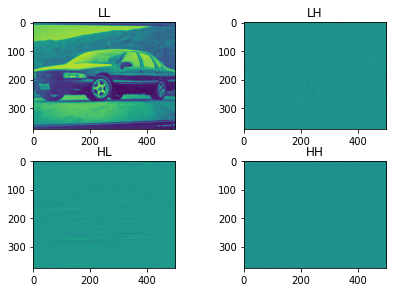

In [10]:
from PIL import Image
from matplotlib import pyplot as plt
!ls /content/drive/MyDrive/Moire/
img = Image.open('/content/drive/MyDrive/Moire/preaugmentedPositiveImages/IMG_2906.jpg').convert('L')
img = img.transpose(Image.FLIP_LEFT_RIGHT)
img.save('chl.jpg')
LL, LH, HL, HH = fwdHaarDWT2D(img)
fig, axes = plt.subplots(2, 2)
fig.tight_layout()
axes[0, 0].imshow(LL)
axes[0, 1].imshow(LH)
axes[1, 0].imshow(HL)
axes[1, 1].imshow(HH)
axes[0, 0].set_title("LL")
axes[0, 1].set_title("LH")
axes[1, 0].set_title("HL")
axes[1, 1].set_title("HH")
plt.show()

## Test training data creation
The training images need to be put in two folders. positiveImages and negativeImages. positiveImages are the images which are captured from the display devices and has the presence of stron or weak Moiré patterms in it.
negativeImages are the ones without Moiré Patterns (i.e. the images which are not captured from the display devices) 

In [9]:
import sys
import argparse
from PIL import Image
from PIL import ImageOps
import random
import sys
import os

from os import listdir
from os.path import isfile, join
from PIL import Image

#The training images need to be put in two folders. positiveImages and negativeImages. positiveImages are the images which are captured from the display devices and has the presence of stron or weak Moiré patterms in it. negativeImages are the ones without Moiré Patterns (i.e. the images which are not captured from the display devices)


def mainAugment(positiveImages, negativeImages):
    
    # global positiveTrainImagePath
    # global negativeTrainImagePath
    
    positiveImagePath = positiveImages
    negativeImagePath = negativeImages
        
    createTrainingData(positiveImagePath, negativeImagePath)

    
#The wavelet decomposed images are the transformed images representing the spatial and the frequency information of the image. These images are stored as 'tiff' in the disk, to preserve that information. Each image is transformed with 180 degrees rotation and as well flipped, as part of data augmentation.

def transformImageAndSave(image, f, customStr, path):
    cA, cH, cV, cD  = fwdHaarDWT2D(image);
    
    fileName = (os.path.splitext(f)[0])
    fLL = (f.replace(fileName, fileName+'_' + customStr + 'LL')).replace('.jpg','.tiff')
    fLH = (f.replace(fileName, fileName+'_' + customStr + 'LH')).replace('.jpg','.tiff')
    fHL = (f.replace(fileName, fileName+'_' + customStr + 'HL')).replace('.jpg','.tiff')
    fHH = (f.replace(fileName, fileName+'_' + customStr + 'HH')).replace('.jpg','.tiff')
    cA = Image.fromarray(cA)
    cH = Image.fromarray(cH)
    cV = Image.fromarray(cV)
    cD = Image.fromarray(cD)

    # print(np.array(cA))
    # print(np.array(cD))
    cA.save(join(path, fLL))
    cH.save(join(path, fLH))
    cV.save(join(path, fHL))
    cD.save(join(path, fHH))
    
    
def augmentAndTrasformImage(f, mainFolder, trainFolder):
    try:
        print(join(mainFolder, f))
        img = Image.open(join(mainFolder, f)) 
    except:
        print('Error: Couldnt read the file {}. Make sure only images are present in the folder'.format(f))
        return None

    imgGray = img.convert('L')
    wdChk, htChk = imgGray.size
    if htChk > wdChk:
        imgGray = imgGray.rotate(-90, expand=1)
        print('training image rotated')
    transformImageAndSave(imgGray, f, '', trainFolder)

    imgGray = imgGray.transpose(Image.ROTATE_180)
    transformImageAndSave(imgGray, f, '180_', trainFolder)

    imgGray = imgGray.transpose(Image.FLIP_LEFT_RIGHT)
    transformImageAndSave(imgGray, f, '180_FLIP_', trainFolder)
    
    return True
    
    
def createTrainingData(positiveImagePath, negativeImagePath):

    print('positive image path: ' + positiveImagePath)
    print('negative image path: ' + negativeImagePath)
    splitRatio = 0.9

    positiveTrainImagePath = '/content/drive/MyDrive/Moire/trainDataPositive'
    negativeTrainImagePath = '/content/drive/MyDrive/Moire/trainDataNegative'
    positiveTestImagePath = '/content/drive/MyDrive/Moire/testDataPositive'
    negativeTestImagePath = '/content/drive/MyDrive/Moire/testDataNegative'

    # create folders (not tracked by git)
    # if not os.path.exists(positiveTrainImagePath):
    #     os.makedirs(positiveTrainImagePath)
    # if not os.path.exists(negativeTrainImagePath):
    #     os.makedirs(negativeTrainImagePath)
    # if not os.path.exists(positiveTestImagePath):
    #     os.makedirs(positiveTestImagePath)
    # if not os.path.exists(negativeTestImagePath):
    #     os.makedirs(negativeTestImagePath)

    # get image files by classes
    positiveImageFiles = [f for f in listdir(positiveImagePath) if (isfile(join(positiveImagePath, f)))]
    negativeImageFiles = [f for f in listdir(negativeImagePath) if (isfile(join(negativeImagePath, f)))]

    positiveDataBorder = round(len(positiveImageFiles) * splitRatio)
    negativeDataBorder = round(len(negativeImageFiles) * splitRatio)

    positiveTrainFiles = positiveImageFiles[:positiveDataBorder]
    positiveTestFiles = positiveImageFiles[positiveDataBorder:]
    negativeTrainFiles = negativeImageFiles[:negativeDataBorder]
    negativeTestFiles = negativeImageFiles[negativeDataBorder:]

    print('positive train samples: ' + str(len(positiveTrainFiles)))
    print('negative train samples: ' + str(len(positiveTestFiles)))
    print('positive test samples: ' + str(len(negativeTrainFiles)))
    print('negative test samples: ' + str(len(negativeTestFiles)))

    Knegative = 0
    Kpositive = 0

    # create positive training images
    for f in positiveTrainFiles:
        ret = augmentAndTrasformImage(f, positiveImagePath, positiveTrainImagePath)
        if ret == None:
            continue
        Kpositive += 3

    # create positive test images
    for f in positiveTestFiles:
        ret = augmentAndTrasformImage(f, positiveImagePath, positiveTestImagePath)
        if ret == None:
            continue
        Kpositive += 3

    # create negative training images
    for f in negativeTrainFiles:
        ret = augmentAndTrasformImage(f, negativeImagePath, negativeTrainImagePath)
        if ret == None:
            continue
        Knegative += 3;

    # create negative training images
    for f in negativeTestFiles:
        ret = augmentAndTrasformImage(f, negativeImagePath, negativeTestImagePath)
        if ret == None:
            continue
        Knegative += 3;
    #
    # print('Total positive files after augmentation: ', Kpositive)
    # print('Total negative files after augmentation: ', Knegative)
    
        

def parse_arguments(argv):
    parser = argparse.ArgumentParser()
    
    parser.add_argument('positiveImages', type=str, help='Directory with positive (Moiré pattern) images.')
    parser.add_argument('negativeImages', type=str, help='Directory with negative (Normal) images.')
    # parser.add_argument('train', type=int, help='0 = train, 1 = test')
    
    return parser.parse_args(argv)


mainAugment('/content/drive/MyDrive/Moire/preaugmentedPositiveImages', '/content/drive/MyDrive/Moire/preaugmentedNegativeImages')

          


positive image path: /content/drive/MyDrive/Moire/preaugmentedPositiveImages
negative image path: /content/drive/MyDrive/Moire/preaugmentedNegativeImages
positive train samples: 48
negative train samples: 5
positive test samples: 53
negative test samples: 6
/content/drive/MyDrive/Moire/preaugmentedPositiveImages/350_letterbox1024.jpg
/content/drive/MyDrive/Moire/preaugmentedPositiveImages/355_letterbox1024.jpg
/content/drive/MyDrive/Moire/preaugmentedPositiveImages/284_letterbox1024.jpg
/content/drive/MyDrive/Moire/preaugmentedPositiveImages/chl.jpg
/content/drive/MyDrive/Moire/preaugmentedPositiveImages/IMG_2855.jpg
/content/drive/MyDrive/Moire/preaugmentedPositiveImages/IMG_2859.jpg
/content/drive/MyDrive/Moire/preaugmentedPositiveImages/IMG_2856.jpg
/content/drive/MyDrive/Moire/preaugmentedPositiveImages/IMG_2860.jpg
/content/drive/MyDrive/Moire/preaugmentedPositiveImages/IMG_2866.jpg
/content/drive/MyDrive/Moire/preaugmentedPositiveImages/IMG_2864.jpg
/content/drive/MyDrive/Moire/p

In [16]:
# from os import listdir
# from os.path import isfile, join
# from PIL import Image


# positiveImagePath = '/content/drive/MyDrive/Moire/preaugmentedPositiveImages'
# negativeImagePath = '/content/drive/MyDrive/Moire/preaugmentedNegativeImages'

# mainAugment(positiveImagePath, negativeImagePath, 0)
   

positive samples: 53
negative samples: 59


OSError: ignored

In [4]:
# !cd ../
!ls

sample_data


## Load Data into Memory
Get your big boy pants on because it's going to be a lot of data.  Increase runtime memory.  Make sure that there is no accelerator used so that it can be used when training.

In [25]:
from matplotlib import pyplot as plt
import numpy as np
import sys
import argparse
from os import listdir
from os.path import isfile, join
from PIL import Image
from sklearn import preprocessing
from sklearn.utils import shuffle
from skimage import io
from sklearn.model_selection import train_test_split
import os
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
from keras.callbacks import ModelCheckpoint

#constants
WIDTH = 500#384
HEIGHT = 375#512

#Here, we perform index based splitting and use those indices to split the our multi-input datasets. This is done because the CNN model is multi-input network
def splitTrainTestDataForBands(inputData, X_train_ind, X_test_ind):
    X_train = np.zeros((len(X_train_ind), WIDTH*HEIGHT))
    for i in range(len(X_train_ind)):
        X_train[i,:] = inputData[int(X_train_ind[i,0]),:]
        
    X_test = np.zeros((len(X_test_ind), WIDTH*HEIGHT))
    for i in range(len(X_test_ind)):
        X_test[i,:] = inputData[int(X_test_ind[i,0]),:]
        
    return X_train, X_test


def countPositiveSamplesAfterSplit(trainData):
    count = 0;
    for i in range(len(trainData)):
        if(trainData[i,0] == 0):
            count = count + 1
    return count

def scaleData(inp, minimum, maximum):
    minMaxScaler = preprocessing.MinMaxScaler(copy=True, feature_range=(minimum,maximum))
    inp = inp.reshape(-1, 1)
    inp = minMaxScaler.fit_transform(inp)
    
    return inp

def readAndScaleImage(f, customStr, trainImagePath, X_LL, X_LH, X_HL, X_HH, X_index, Y, sampleIndex, sampleVal):
    fileName = (os.path.splitext(f)[0])
    # print(fileName)
    # print(customStr)

    fLL = (f.replace(fileName, fileName + customStr)).replace('.jpg','.tiff')
    fLH = (f.replace(fileName, fileName + customStr)).replace('.jpg','.tiff')
    fHL = (f.replace(fileName, fileName + customStr)).replace('.jpg','.tiff')
    fHH = (f.replace(fileName, fileName + customStr)).replace('.jpg','.tiff')
    
    try:
        imgLL = Image.open(join(trainImagePath, fLL))
        imgLH = Image.open(join(trainImagePath, fLH))
        imgHL = Image.open(join(trainImagePath, fHL))
        imgHH = Image.open(join(trainImagePath, fHH))
    except Exception as e:
        print('Error: Couldnt read the file {}. Make sure only images are present in the folder'.format(fileName))
        print('Exception:', e)
        return None
        
    imgLL = np.array(imgLL)
    imgLH = np.array(imgLH)
    imgHL = np.array(imgHL)
    imgHH = np.array(imgHH)
    imgLL = scaleData(imgLL, 0, 1)
    imgLH = scaleData(imgLH, -1, 1)
    imgHL = scaleData(imgHL, -1, 1)
    imgHH = scaleData(imgHH, -1, 1)
    
    imgVector = imgLL.reshape(1, WIDTH*HEIGHT)
    X_LL[sampleIndex, :] = imgVector
    imgVector = imgLH.reshape(1, WIDTH*HEIGHT)
    X_LH[sampleIndex, :] = imgVector
    imgVector = imgHL.reshape(1, WIDTH*HEIGHT)
    X_HL[sampleIndex, :] = imgVector
    imgVector = imgHH.reshape(1, WIDTH*HEIGHT)
    X_HH[sampleIndex, :] = imgVector
    
    Y[sampleIndex, 0] = sampleVal;
    X_index[sampleIndex, 0] = sampleIndex;
    
    return True

def trainTestSplit(X_LL, X_LH, X_HL, X_HH, X_index, Y, imageCount):
    testCountPercent = 0.1

    # evaluate the model by splitting into train and test sets
    # X_train_ind, X_test_ind, y_train, y_test = train_test_split(X_index, Y, test_size=testCountPercent, random_state=1, stratify=Y)

    # X_LL_train, X_LL_test = splitTrainTestDataForBands(X_LL, X_train_ind, X_test_ind)
    # X_LH_train, X_LH_test = splitTrainTestDataForBands(X_LH, X_train_ind, X_test_ind)
    # X_HL_train, X_HL_test = splitTrainTestDataForBands(X_HL, X_train_ind, X_test_ind)
    # X_HH_train, X_HH_test = splitTrainTestDataForBands(X_HH, X_train_ind, X_test_ind)
    X_LL_train = X_LL
    X_LH_train = X_LH
    X_HL_train = X_HL
    X_HH_train = X_HH

    imageHeight = HEIGHT
    imageWidth = WIDTH


    # print(countPositiveSamplesAfterSplit(y_train))
    print(len(X_LL_train))
    # print(len(y_train))
    # print(len(X_LL_test))
    # print(len(y_test))

    # num_train_samples = len(y_train)
    print('num_train_samples', len(X_LL))
    X_LL_train = np.array(X_LL_train)
    X_LL_train = X_LL_train.reshape((len(X_LL), imageHeight, imageWidth, 1))
    # X_LL_test = np.array(X_LL_test)
    # X_LL_test = X_LL_test.reshape((imageCount - num_train_samples, imageHeight, imageWidth, 1))

    X_LH_train = np.array(X_LH_train)
    X_LH_train = X_LH_train.reshape((len(X_LH), imageHeight, imageWidth, 1))
    # X_LH_test = np.array(X_LH_test)
    # X_LH_test = X_LH_test.reshape((imageCount - num_train_samples, imageHeight, imageWidth, 1))

    X_HL_train = np.array(X_HL_train)
    X_HL_train = X_HL_train.reshape((len(X_HL), imageHeight, imageWidth, 1))
    # X_HL_test = np.array(X_HL_test)
    # X_HL_test = X_HL_test.reshape((imageCount - num_train_samples, imageHeight, imageWidth, 1))
    
    X_HH_train = np.array(X_HH_train)
    X_HH_train = X_HH_train.reshape((len(X_HH), imageHeight, imageWidth, 1))
    # X_HH_test = np.array(X_HH_test)
    # X_HH_test = X_HH_test.reshape((imageCount - num_train_samples, imageHeight, imageWidth, 1))

    y_train = np.array(Y)
    # y_test = np.array(y_test)

    # num_train, height, width, depth = X_LL_train.shape
    # num_test = X_LL_test.shape[0]
    # num_classes = len(np.unique(y_train))
    
    return X_LL_train, X_LH_train, X_HL_train, X_HH_train, y_train

def readImageSet(imageFiles, trainImagePath, X_LL, X_LH, X_HL, X_HH, X_index, Y, sampleIndex, bClass):

    for f in imageFiles:
        ret = readAndScaleImage(f, '', trainImagePath, X_LL, X_LH, X_HL, X_HH, X_index, Y, sampleIndex, bClass)
        if ret == True:
            sampleIndex = sampleIndex + 1

        # #read 180deg rotated data
        # ret = readAndScaleImage(f, '_180', trainImagePath, X_LL, X_LH, X_HL, X_HH, X_index, Y, sampleIndex,bClass)
        # if ret == True:
        #     sampleIndex = sampleIndex + 1
        #
        # #read 180deg FLIP data
        # ret = readAndScaleImage(f, '_180_FLIP', trainImagePath, X_LL, X_LH, X_HL, X_HH, X_index, Y, sampleIndex, bClass)
        # if ret == True:
        #     sampleIndex = sampleIndex + 1
     
    return sampleIndex

def readWaveletData(positiveImagePath, negativeImagePath):
    
    # get augmented, balanced training data image files by class
    positiveImageFiles = [f for f in listdir(positiveImagePath) if (isfile(join(positiveImagePath, f)))]
    negativeImageFiles = [f for f in listdir(negativeImagePath) if (isfile(join(negativeImagePath, f)))]

    positiveCount = len(positiveImageFiles)
    negativeCount = len(negativeImageFiles)

    print('positive samples: ' + str(positiveCount))
    print('negative samples: ' + str(negativeCount))
    imageCount = positiveCount + negativeCount
    #intialization
    X_LL = np.zeros((positiveCount + negativeCount, WIDTH*HEIGHT))
    X_LH = np.zeros((positiveCount + negativeCount, WIDTH*HEIGHT))
    X_HL = np.zeros((positiveCount + negativeCount, WIDTH*HEIGHT))
    X_HH = np.zeros((positiveCount + negativeCount, WIDTH*HEIGHT))
    X_index = np.zeros((positiveCount + negativeCount, 1))
    Y = np.zeros((positiveCount + negativeCount, 1))
    
    sampleIndex = 0
    # read all images, convert to float, divide by 255 (leads to gray range 0..1), reshape into a row vector
    # write class 0 for positive and 1 for negative samples    
    print('SHAPES 1')
    print(X_LL.shape)
    print(X_LH.shape)
    print(X_HL.shape)
    print(X_HH.shape)

    sampleIndex = readImageSet(positiveImageFiles, positiveImagePath, X_LL, X_LH, X_HL, X_HH, X_index, Y, sampleIndex, 0)
    print('positive data loaded.')
    
    sampleIndex += readImageSet(negativeImageFiles, negativeImagePath, X_LL, X_LH, X_HL, X_HH, X_index, Y, sampleIndex, 1)
    print('negative data loaded.')

    print('Total Samples Loaded: ', sampleIndex)
    # print(X_LL)
    # print(X_LH)
    # print(Y)
    X_LL, X_LH, X_HL, X_HH, Y = shuffle(X_LL, X_LH, X_HL, X_HH, Y, random_state=0)
    
    return X_LL, X_LH, X_HL, X_HH, X_index, Y, imageCount

def mainReadDatafromDrive(trainingDataPositive, trainingDataNegative):
    # positiveImagePath = (args.positiveImages)
    # negativeImagePath = (args.negativeImages)
    positiveTrainImagePath = trainingDataPositive
    negativeTrainImagePath = trainingDataNegative
    # positiveTestImagePath = args.testingDataPositive
    # negativeTestImagePath = args.testingDataNegative

    X_LL, X_LH, X_HL, X_HH, X_index, Y, imageCount = readWaveletData(positiveTrainImagePath, negativeTrainImagePath)

    print('SHAPES')
    print(X_LL.shape)
    print(X_LH.shape)
    print(X_HL.shape)
    print(X_HH.shape)

    X_LL_train, X_LH_train, X_HL_train, X_HH_train, Y_train = trainTestSplit(X_LL, X_LH, X_HL, X_HH, X_index, Y, imageCount)
    return X_LL_train, X_LH_train, X_HL_train, X_HH_train, Y_train;

# X_LL_train, X_LH_train, X_HL_train, X_HH_train, Y_train = mainReadDatafromDrive('/content/drive/MyDrive/Moire/trainDataPositive', '/content/drive/MyDrive/Moire/trainDataNegative')
# print(X_LL_train)

## Train CNN Model

In [13]:
import os

from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Activation, Flatten, Add, Multiply, Maximum

def createModel(height, width, depth, num_classes):
#     num_epochs = 20 # 50 26 200 # we iterate 200 times over the entire training set
    kernel_size_1 = 7 # we will use 7x7 kernels 
    kernel_size_2 = 3 # we will use 3x3 kernels 
    pool_size = 2 # we will use 2x2 pooling throughout
    conv_depth_1 = 32 # we will initially have 32 kernels per conv. layer...
    conv_depth_2 = 16 # ...switching to 16 after the first pooling layer
    drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
    drop_prob_2 = 0.5 # dropout in the FC layer with probability 0.5
    hidden_size = 32 # 128 512 the FC layer will have 512 neurons


    inpLL = Input(shape=(height, width, depth)) # depth goes last in TensorFlow back-end (first in Theano)
    inpLH = Input(shape=(height, width, depth)) # depth goes last in TensorFlow back-end (first in Theano)
    inpHL = Input(shape=(height, width, depth)) # depth goes last in TensorFlow back-end (first in Theano)
    inpHH = Input(shape=(height, width, depth)) # depth goes last in TensorFlow back-end (first in Theano)

    conv_1_LL = Convolution2D(conv_depth_1, (kernel_size_1, kernel_size_1), padding='same', activation='relu')(inpLL)
    conv_1_LH = Convolution2D(conv_depth_1, (kernel_size_1, kernel_size_1), padding='same', activation='relu')(inpLH)
    conv_1_HL = Convolution2D(conv_depth_1, (kernel_size_1, kernel_size_1), padding='same', activation='relu')(inpHL)
    conv_1_HH = Convolution2D(conv_depth_1, (kernel_size_1, kernel_size_1), padding='same', activation='relu')(inpHH)
    pool_1_LL = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_1_LL)
    pool_1_LH = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_1_LH)
    pool_1_HL = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_1_HL)
    pool_1_HH = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_1_HH)

    avg_LH_HL_HH = Maximum()([pool_1_LH, pool_1_HL, pool_1_HH])
    inp_merged = Multiply()([pool_1_LL, avg_LH_HL_HH])
    C4 = Convolution2D(conv_depth_2, (kernel_size_2, kernel_size_2), padding='same', activation='relu')(inp_merged)
    S2 = MaxPooling2D(pool_size=(4, 4))(C4)
    drop_1 = Dropout(drop_prob_1)(S2)
    C5 = Convolution2D(conv_depth_1, (kernel_size_2, kernel_size_2), padding='same', activation='relu')(drop_1)
    S3 = MaxPooling2D(pool_size=(pool_size, pool_size))(C5)
    C6 = Convolution2D(conv_depth_1, (kernel_size_2, kernel_size_2), padding='same', activation='relu')(S3)
    S4 = MaxPooling2D(pool_size=(pool_size, pool_size))(C6)
    drop_2 = Dropout(drop_prob_1)(S4)
    # Now flatten to 1D, apply FC -> ReLU (with dropout) -> softmax
    flat = Flatten()(drop_2)
    hidden = Dense(hidden_size, activation='relu')(flat)
    drop_3 = Dropout(drop_prob_2)(hidden)
    out = Dense(num_classes, activation='softmax')(drop_3)
    
    model = Model(inputs=[inpLL, inpLH, inpHL, inpHH], outputs=out) # To define a model, just specify its input and output layers
    
    return model

In [14]:
#To detect Moire ́ patternzs, images are first decomposed using Wavelet decomposition (refer to file '') and trained using multi-input Convolutional neural network. The strength of the proposed CNN model is, it uses the LL intensity image (from the Wavelet decomposition) as a weight parameter for the Moire ́ pattern, thereby approximating the spatial spread of the Moire ́ pattern in the image. Usage of CNN model performs better than frequency thresholding approach as the model is trained considering diverse scenarios and it is able to distinguish between the high frequency of background texture and the Moire ́ pattern.

from matplotlib import pyplot as plt
import numpy as np
import sys
import argparse
from os import listdir
from os.path import isfile, join
from PIL import Image
from sklearn import preprocessing
from sklearn.utils import shuffle
from skimage import io
from sklearn.model_selection import train_test_split
import os
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
from keras.callbacks import ModelCheckpoint

# - read positive and negative training data
# - create X and Y from training data


def mainTrain(X_LL_train, X_LH_train, X_HL_train, X_HH_train, Y_train, numEpochs):
    # positiveImagePath = (args.positiveImages)
    # negativeImagePath = (args.negativeImages)
    # numEpochs = epochs
    # positiveTrainImagePath = trainingDataPositive
    # negativeTrainImagePath = trainingDataNegative
    # positiveTestImagePath = args.testingDataPositive
    # negativeTestImagePath = args.testingDataNegative

    # X_LL, X_LH, X_HL, X_HH, X_index, Y, imageCount = readWaveletData(positiveTrainImagePath, negativeTrainImagePath)

    
    # X_LL_train, X_LH_train, X_HL_train, X_HH_train, Y_train = trainTestSplit(X_LL, X_LH, X_HL, X_HH, X_index, Y, imageCount)
    # X_LL_train,X_LH_train,X_HL_train,X_HH_train,Y_train,X_LL_test,X_LH_test,X_HL_test,X_HH_test,Y_test = trainTestSplit(X_LL, X_LH, X_HL, X_HH, X_index, Y, imageCount)

    model = trainCNNModel(X_LL_train, X_LH_train, X_HL_train, X_HH_train, Y_train, numEpochs)
    
    # evaluate(model, X_LL_test,X_LH_test,X_HL_test,X_HH_test,Y_test)
    

def trainCNNModel(X_LL_train,X_LH_train,X_HL_train,X_HH_train,y_train,num_epochs):

    batch_size = 32 # in each iteration, we consider 32 training examples at once
    print("SHAPE")
    print(X_LL_train.shape);
    num_train, height, width, depth = X_LL_train.shape
    num_classes = len(np.unique(y_train))
    Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
    print(y_train);
    # Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

    checkPointFolder = 'content/drive/MyDrive/Moire/checkPoint'
    checkpoint_name = checkPointFolder + '/Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
    checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
    callbacks_list = [checkpoint]
    
    if not os.path.exists(checkPointFolder):
        os.makedirs(checkPointFolder)
        
        
    model = createModel(height, width, depth, num_classes)
    
    model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
                  optimizer='adam', # using the Adam optimiser
                  metrics=['accuracy']) # reporting the accuracy

    model.fit([X_LL_train,X_LH_train,X_HL_train,X_HH_train], Y_train,                # Train the model using the training set...
              batch_size=batch_size, epochs=num_epochs,
              verbose=1, validation_split=0.1, callbacks=callbacks_list) # ...holding out 10% of the data for validation
    # score, acc = model.evaluate([X_LL_test,X_LH_test,X_HL_test,X_HH_test], Y_test, verbose=1)  # Evaluate the trained model on the test set!

    model.save('content/drive/MyDrive/Moire/checkPoint/moirePattern3CNN_.h5')
    
    return model


def evaluate(model, X_LL_test,X_LH_test,X_HL_test,X_HH_test,y_test):

    model_out = model.predict([X_LL_test,X_LH_test,X_HL_test,X_HH_test])
    passCnt = 0
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(y_test)):
        if np.argmax(model_out[i, :]) == y_test[i]:
            str_label='Pass'
            passCnt = passCnt + 1
        else:
            str_label='Fail'

        if y_test[i] ==0:
            if np.argmax(model_out[i, :]) == y_test[i]:
                TP = TP + 1;
            else:
                FN = FN + 1
        else:
            if np.argmax(model_out[i, :]) == y_test[i]:
                TN = TN + 1;
            else:
                FP = FP + 1

    start = "\033[1m"
    end = "\033[0;0m"
    print(start + 'confusion matrix (test / validation)' + end)
    print(start + 'true positive:  '+ end + str(TP))
    print(start + 'false positive: '+ end + str(FP))
    print(start + 'true negative:  '+ end + str(TN))
    print(start + 'false negative: '+ end + str(FN))
    print('\n')
    print(start + 'accuracy:  ' + end + "{:.4f} %".format(100*(TP+TN)/(TP+FP+FN+TN)))
    print(start + 'precision: ' + end + "{:.4f} %".format(100*TP/(TP + FP)))
    print(start + 'recall:  ' + end + "{:.4f} %".format(100*TP/(TP + FN)))


def parse_arguments(argv):
    parser = argparse.ArgumentParser()
    
    # parser.add_argument('positiveImages', type=str, help='Directory with original positive (Moiré pattern) images.')
    # parser.add_argument('negativeImages', type=str, help='Directory with original negative (Normal) images.')
    
    parser.add_argument('trainingDataPositive', type=str, help='Directory with transformed positive (Moiré pattern) images for training.')
    parser.add_argument('trainingDataNegative', type=str, help='Directory with transformed negative (Normal) images for training.')

    # parser.add_argument('testingDataPositive', type=str, help='Directory with transformed positive (Moiré pattern) images for testing.')
    # parser.add_argument('testingDataNegative', type=str, help='Directory with transformed negative (Normal) images for testing.')
    
    parser.add_argument('epochs', type=int, help='Number of epochs for training')
    
    return parser.parse_args(argv)



print(X_LL_train)
mainTrain(X_LL_train, X_LH_train, X_HL_train, X_HH_train, Y_train, 30)

[[[[0.53679651]
   [0.48484847]
   [0.44155842]
   ...
   [0.44155842]
   [0.44588745]
   [0.45454544]]

  [[0.47619048]
   [0.48051947]
   [0.47186145]
   ...
   [0.40692639]
   [0.43290043]
   [0.46753246]]

  [[0.49350649]
   [0.47619048]
   [0.42857143]
   ...
   [0.42424241]
   [0.43290043]
   [0.46320346]]

  ...

  [[0.45021644]
   [0.45021644]
   [0.45021644]
   ...
   [0.44588745]
   [0.42857143]
   [0.41125542]]

  [[0.45021644]
   [0.45021644]
   [0.45021644]
   ...
   [0.48051947]
   [0.46320346]
   [0.45021644]]

  [[0.45021644]
   [0.45021644]
   [0.45021644]
   ...
   [0.44155842]
   [0.43290043]
   [0.46320346]]]


 [[[0.56026793]
   [0.51339293]
   [0.4620536 ]
   ...
   [0.42410719]
   [0.54464293]
   [0.56919646]]

  [[0.5714286 ]
   [0.43750003]
   [0.4508929 ]
   ...
   [0.4464286 ]
   [0.52901793]
   [0.52901793]]

  [[0.54464293]
   [0.53125006]
   [0.45535719]
   ...
   [0.50446433]
   [0.51785719]
   [0.48660719]]

  ...

  [[0.4620536 ]
   [0.44866076]
   [0.6

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


35/35 [==============================] - 120s 3s/step - loss: 0.6927 - accuracy: 0.5099 - val_loss: 0.6853 - val_accuracy: 0.5656

Epoch 00002: val_loss improved from 0.69269 to 0.68528, saving model to content/drive/MyDrive/Moire/checkPoint/Weights-002--0.68528.hdf5
Epoch 3/30
35/35 [==============================] - 119s 3s/step - loss: 0.6739 - accuracy: 0.5969 - val_loss: 0.5513 - val_accuracy: 0.7295

Epoch 00003: val_loss improved from 0.68528 to 0.55132, saving model to content/drive/MyDrive/Moire/checkPoint/Weights-003--0.55132.hdf5
Epoch 4/30
35/35 [==============================] - 118s 3s/step - loss: 0.5768 - accuracy: 0.6866 - val_loss: 0.4926 - val_accuracy: 0.8033

Epoch 00004: val_loss improved from 0.55132 to 0.49261, saving model to content/drive/MyDrive/Moire/checkPoint/Weights-004--0.49261.hdf5
Epoch 5/30
35/35 [==============================] - 120s 3s/step - loss: 0.4770 - accuracy: 0.7518 - val_loss: 0.3267 - val_accuracy: 0.8525

Epoch 00005: val_loss improved f

In [16]:
# positiveTrainImagePath = './trainDataPositive'
# negativeTrainImagePath = './trainDataNegative'
# epochs = 10
    
# mainTrain(positiveImagePath, negativeImagePath, positiveTrainImagePath, negativeTrainImagePath, epochs)
!ls content/drive/MyDrive/Moire/checkPoint/
from google.colab import files
files.download('content/drive/MyDrive/Moire/checkPoint/Weights-028--0.06866.hdf5')

moirePattern3CNN_.h5	   Weights-006--0.30881.hdf5  Weights-016--0.14864.hdf5
Weights-001--0.69269.hdf5  Weights-007--0.25903.hdf5  Weights-017--0.13076.hdf5
Weights-002--0.68528.hdf5  Weights-008--0.17978.hdf5  Weights-018--0.09903.hdf5
Weights-003--0.55132.hdf5  Weights-009--0.17036.hdf5  Weights-028--0.06866.hdf5
Weights-004--0.49261.hdf5  Weights-012--0.16418.hdf5
Weights-005--0.32671.hdf5  Weights-014--0.15639.hdf5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Test CNN Evaluation

In [26]:
from matplotlib import pyplot as plt
import numpy as np
import sys
import argparse
from os import listdir
from os.path import isfile, join
from PIL import Image
from sklearn import preprocessing
from skimage import io
from sklearn.model_selection import train_test_split
import os




#constants
width = 500#384 #change dimensions according to the input image in the training
height = 375#512 #change dimensions according to the input image in the training
depth = 1
num_classes = 2

# positiveTestImagePath = './testDataPositive'
# negativeTestImagePath = './testDataNegative'
    
def mainTest(weightsFile, positiveTestImages, negativeTestImages):
    weights_file = (weightsFile)
    positiveImagePath = (positiveTestImages)
    negativeImagePath = (negativeTestImages)

    print(positiveImagePath)
    print(negativeImagePath)
    # print(positiveTestImagePath)
    # print(positiveTestImagePath)
    
    # mainAugment(positiveImagePath, negativeImagePath, 1)
    # X_LL, X_LH, X_HL, X_HH, X_index, Y, imageCount = readWaveletData(positiveImagePath, negativeImagePath)
    X_LL, X_LH, X_HL, X_HH, X_index, Y, imageCount = mainReadDatafromDrive(positiveImagePath, negativeImagePath)
    
    # X_LL = np.array(X_LL)
    # X_LL = X_LL.reshape((imageCount, height, width, depth))
    # X_LH = np.array(X_LH)
    # X_LH = X_LH.reshape((imageCount, height, width, depth))
    # X_HL = np.array(X_HL)
    # X_HL = X_HL.reshape((imageCount, height, width, depth))
    # X_HH = np.array(X_HH)
    # X_HH = X_HH.reshape((imageCount, height, width, depth))
    
    CNN_model = createModel(height, width, depth, num_classes)
    CNN_model.load_weights(weights_file)
    evaluate(CNN_model,X_LL,X_LH,X_HL,X_HH, Y)



def run(model, X_LL_test,X_LH_test,X_HL_test,y_test):
    return


def parse_arguments(argv):
    parser = argparse.ArgumentParser()
    
    parser.add_argument('weightsFile', type=str, help='saved CNN model file')
    
    parser.add_argument('positiveTestImages', type=str, help='Directory with positive (Moiré pattern) images.')
    parser.add_argument('negativeTestImages', type=str, help='Directory with negative (Normal) images.')
    
    
    return parser.parse_args(argv)

In [27]:
weightsFile = "moirePattern3CNN_.h5"
    
    
mainTest('content/drive/MyDrive/Moire/checkPoint/Weights-028--0.06866.hdf5', '/content/drive/MyDrive/Moire/testDataPositive', '/content/drive/MyDrive/Moire/testDataNegative')


/content/drive/MyDrive/Moire/testDataPositive
/content/drive/MyDrive/Moire/testDataNegative
positive samples: 60
negative samples: 72
SHAPES 1
(132, 187500)
(132, 187500)
(132, 187500)
(132, 187500)


ValueError: ignored